In [1]:
from __future__ import print_function, division

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#from sklearn.cross_validation import train_test_split

In [3]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Build Models from icd9-code features created using Likelihood model

**data tables** : new_alive, new_icd9


\\[\frac{P(death | icd9 =x) }{P(survival | icd9 =x)} = prior* \frac{ P(icd9 = x | death) }{P(icd9 = x | survival)} \\]

\\[  = prior* \frac{ \frac{count Deaths}{All Deaths}} {\frac{count Survival}{All Survival}} \\]



In [4]:
df = pd.read_csv('mimic_data/data_model1.csv')

In [5]:
df[:3]

,hadm_id,subject_id,expire_flag,gender,admission_type,diagnosis,age,07031,07041,1481,...,85205,85225,9878,99685,99688,E9278,V1062,V143,V4578,V568
0,121205,91,1,F,EMERGENCY,FEVER,81.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,183686,94,1,M,EMERGENCY,SEPSIS,74.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,140037,94,1,M,EMERGENCY,PNEUMONIA,74.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# ############ Admission_type into categorical 
cols = ['NEWBORN', 'URGENT', 'EMERGENCY', 'ELECTIVE']
nums = [0, 1, 2, 3 ]
print(df.admission_type.unique())

df.admission_type.replace(cols, nums, inplace=True)

['EMERGENCY' 'ELECTIVE' 'URGENT' 'NEWBORN']


In [7]:
########### Gender ##########
gen = ["M", "F"]
n_g = [0,1]
df.gender.replace(gen, n_g, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 54 columns):
hadm_id           58976 non-null int64
subject_id        58976 non-null int64
expire_flag       58976 non-null int64
gender            58976 non-null int64
admission_type    58976 non-null int64
diagnosis         58951 non-null object
age               58976 non-null float64
07031             58973 non-null float64
07041             58973 non-null float64
1481              58973 non-null float64
1519              58973 non-null float64
1530              58973 non-null float64
1560              58973 non-null float64
1715              58973 non-null float64
1910              58973 non-null float64
1965              58973 non-null float64
1971              58973 non-null float64
1972              58973 non-null float64
1984              58973 non-null float64
20030             58973 non-null float64
20510             58973 non-null float64
2468              58973 non-null float64


In [9]:
df.dropna(inplace=True)

In [37]:
def pr_curve(truthvec, scorevec, s, digit_prec=2):
    threshvec = np.unique(np.round(scorevec,digit_prec))
    numthresh = len(threshvec)
    tpvec = np.zeros(numthresh)
    fpvec = np.zeros(numthresh)
    fnvec = np.zeros(numthresh)

    for i in range(numthresh):
        thresh = threshvec[i]
        tpvec[i] = sum(truthvec[scorevec>=thresh])
        fpvec[i] = sum(1-truthvec[scorevec>=thresh])
        fnvec[i] = sum(truthvec[scorevec<thresh])
    recallvec = tpvec/(tpvec + fnvec)
    precisionvec = tpvec/(tpvec + fpvec)
    plt.plot(precisionvec,recallvec, label=s)
    plt.axis([0, 1, 0, 1])
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    plt.legend()
    return (recallvec, precisionvec, threshvec)

In [11]:
# exclude diagnosis from the fit
df.columns.values
cols = ['gender', 'admission_type',
       'age', '07031', '07041', '1481', '1519', '1530',
       '1560', '1715', '1910', '1965', '1971', '1972', '1984', '20030',
       '20510', '2468', '25023', '27953', '29389', '3581', '36001',
       '36019', '36400', '3643', '3693', '37239', '37900', '4449', '46611',
       '485', '48801', '51181', '5581', '58281', '6829', '72290', '73004',
       '78939', '85205', '85225', '9878', '99685', '99688', 'E9278',
       'V1062', 'V143', 'V4578', 'V568'] # 'hadm_id', 'subject_id', 'expire_flag','diagnosis'

X = df.loc[:, cols]
y = df.loc[:,'expire_flag']

# Logistic Model: Gender, Age, Admission type + ICD9 codes

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=4444 )

In [13]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
y_pred_lr = lr_model.fit(X_train, y_train).predict_proba(X_test)

In [19]:
lr_vec = y_pred_lr[:,1]

In [69]:
#accuracy_score(y_test, y_pred_lr, normalize=True)

In [47]:
roc_auc_score(y_test,lr_vec)


0.78511138435793926

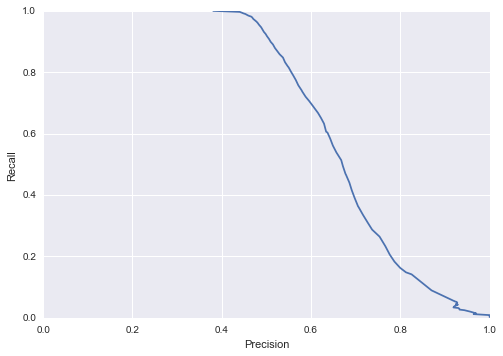

In [22]:
pr_curve(y_test, lr_vec,);

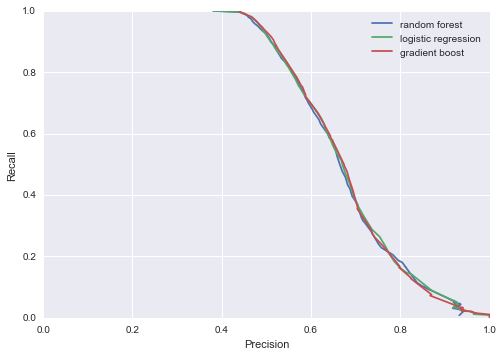

In [48]:
#random forest
plt.figure()
pr_curve(y_test, rf1_pred_vec,'random forest')
pr_curve(y_test, lr_vec,'logistic regression')
gb1_pr=pr_curve(y_test,gb1_pred_vec, 'gradient boost')
#plt.savefig('pr');

In [ ]:
#################
### for predict_proba, use log-loss

# for col in X_train.columns:
#     print (col)
#     X_tr = X_train.loc[:, col].values.reshape(-1,1)
#     X_te = X_test.loc[:,col].values.reshape(-1,1)
#     lr_model = LogisticRegression()
#     lr_model.fit(X_tr, y_train)
#     y_prob_pred = lr_model.predict_proba(X_te)[:,1]
#     print( "log-loss",log_loss(y_test, y_prob_pred)) 

# Random forest + gradient boosting


In [24]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, log_loss


In [25]:
print("accuracy \t",accuracy_score(y_test, y_pred_RF, normalize=True))
print ("precision \t ", precision_score(y_test, y_pred_RF))
print ("recall \t", recall_score(y_test, y_pred_RF))
print ('f1 \t',f1_score(y_test, y_pred_RF))

accuracy 	 0.711224201301
precision 	  0.637901861252
recall 	 0.559596259463
f1 	 0.596188819483


Notes
+ recall is improved when max_features is increased
+ n_estimators : does not seem to have an affect


In [26]:
rnd = RandomForestClassifier(n_estimators=1000, max_features='sqrt', n_jobs=-1)
y_pred_RF_P = rnd.fit(X_train, y_train).predict_proba(X_test)


In [27]:
rnd.feature_importances_

array([  7.55911106e-03,   2.67072372e-01,   5.93016302e-01,
         9.37489886e-04,   3.41185935e-03,   6.95941689e-04,
         1.19275195e-03,   6.31767820e-04,   2.59268686e-03,
         8.84107726e-04,   1.17773782e-03,   2.55415817e-03,
         4.98403853e-03,   2.20200375e-02,   9.95047139e-03,
         1.44929369e-03,   5.21047332e-03,   6.02866794e-04,
         1.66223960e-03,   1.01417222e-03,   1.73591877e-03,
         1.84780622e-03,   8.93812286e-04,   6.61872231e-04,
         8.12077260e-04,   6.66628220e-04,   7.33451073e-04,
         1.81751973e-03,   9.60277927e-04,   1.13305481e-03,
         1.22217272e-03,   6.66068601e-03,   2.47132410e-04,
         1.02131354e-02,   2.93649146e-03,   3.44212258e-03,
         2.37264183e-03,   2.12907679e-03,   1.20249804e-03,
         2.41656075e-03,   3.21826724e-03,   3.21937933e-03,
         8.19272300e-04,   1.53031939e-02,   1.97408893e-04,
         1.58312164e-03,   2.23329676e-04,   6.63288784e-04,
         1.29860618e-03,

In [28]:
y_pred_RF_P = rnd.fit(X_train, y_train).predict_proba(X_test)

# print("accuracy \t",accuracy_score(y_test, y_pred_RF_P, normalize=True))
# print ("precision \t ", precision_score(y_test, y_pred_RF_P))
# print ("recall \t", recall_score(y_test, y_pred_RF_P))
# print ('f1 \t',f1_score(y_test, y_pred_RF_P))

In [106]:
y_pred_RF_P.shape

(17685, 2)

In [30]:
#second column 
rf1_pred_vec = y_pred_RF_P[:,1]

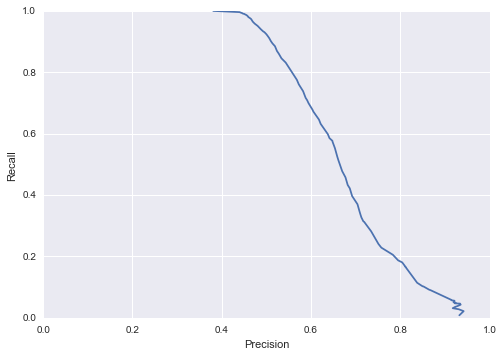

In [31]:
plt.figure()
pr_curve(y_test, rf1_pred_vec);

In [108]:
np.mean(y_test)

0.3809443030817077

In [109]:
roc_auc_score(y_test,rf1_pred_vec)

0.78305890574569825

a possible way of interpreting this model : 
if I want to isolate a group of patients in the ICU with 80% precision, (80 TP/ 20 FP), so that 4/5ths have high mortality (are likely to die / WILL die) for special care, I can do this with 20% recall (Meaning we will catch only 20% of all patients who will die) 

If we want to catch more of the total patients who will die (Higher recall) 

In [39]:
model_gb1 = GradientBoostingClassifier(n_estimators=4000,max_depth=3,learning_rate=.003)
model_gb1.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.003, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=4000, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [43]:

# predict class labels for the test set
gb1_pred_mat = model_gb1.predict_proba(X_test)
gb1_pred_vec = gb1_pred_mat[:,1]

In [61]:
a = list(zip(X.columns, model_gb1.feature_importances_))

In [66]:
a.sort(key=lambda tup: tup[1]) 
a

[('07031', 0.0),
 ('1530', 0.0),
 ('2468', 0.0),
 ('27953', 0.0),
 ('48801', 0.0),
 ('V1062', 0.0),
 ('V4578', 0.00032843550138691812),
 ('3643', 0.00038562205059358365),
 ('36001', 0.00043867411880880715),
 ('36019', 0.00045322759018383383),
 ('36400', 0.0005374270194978746),
 ('99688', 0.0011513873336826943),
 ('V568', 0.0012544472933040242),
 ('3581', 0.0014134682424948),
 ('1481', 0.0014381176129184263),
 ('9878', 0.0025916238305247453),
 ('37900', 0.0044784825802590056),
 ('E9278', 0.0048391917914490726),
 ('3693', 0.0072980767606757885),
 ('V143', 0.0086335237838079341),
 ('1715', 0.0094602557057114588),
 ('4449', 0.0096327157951808552),
 ('20030', 0.0098159468227399117),
 ('1519', 0.012104069702195231),
 ('46611', 0.013213113294003768),
 ('1910', 0.014751468654264216),
 ('72290', 0.016990849333839365),
 ('37239', 0.017024036768401463),
 ('gender', 0.017257996301413749),
 ('29389', 0.01754262269468685),
 ('25023', 0.018106951339353916),
 ('73004', 0.019491224588423704),
 ('78939'

In [ ]:
('85225', 0.023728398524586445),
 ('58281', 0.02449622482246934),
 ('6829', 0.024804630629938505),
 ('20510', 0.025198270897120314),
 ('1971', 0.02572697097360083),
 ('07041', 0.025937043632540509),
 ('485', 0.031539383481972216),
 ('51181', 0.032793101127143578),
 ('99685', 0.03296745209222874),
 ('1984', 0.037243108801294431),
 ('1972', 0.04072702054898935),
 ('admission_type', 0.054172788832846458),
 ('age', 0.30028027265805535)]

In [ ]:
age, 0.3

In [41]:
roc_auc_score(y_test,gb1_pred_vec)


0.78740881028857657

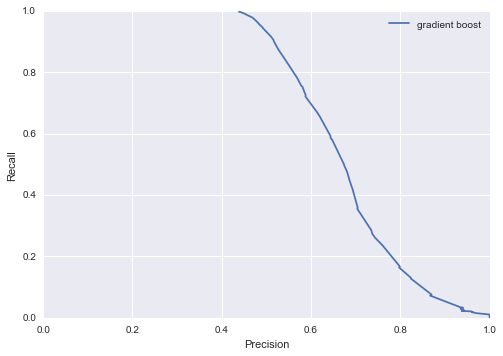

In [44]:
gb1_pr=pr_curve(y_test,gb1_pred_vec, 'gradient boost');
